In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 86 kB 7.0 MB/s 
     |████████████████████████████████| 448 kB 67.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  23663      0 --:--:-- --:--:-- --:--:-- 23663


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:11 https://developer.download.nvidia.com/compute/cuda

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  29.5M      0 --:--:-- --:--:-- --:--:-- 29.4M


In [5]:
import pandas as pd

In [19]:
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


중복 빼기

In [11]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)  # inplace =True 덮어쓰기
len(total_data)

199908

In [15]:
from sklearn.model_selection import train_test_split

In [13]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

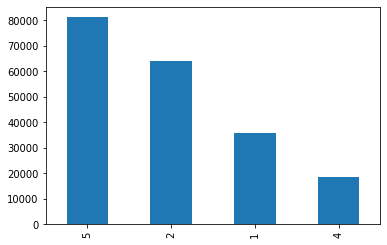

In [18]:
y_data.value_counts().plot(kind='bar')

3이 빠져있는 데이터 -> 그냥 진행하면 문제가 있기 때문에 임의로 채워넣어야함

# NLP

In [22]:
x_train.str.replace('[가-힣ㄱ-ㅎㅠ]','')

144561                              
190171                              
163295              80%  .    .    .
175942                         !   ㅜ
177006                         .    
                     ...            
76719                               
105839                          ㅡ...
140734        ..    ..       .. ..ㅡㅡ
10965                               
130141                              
Name: reviews, Length: 149931, dtype: object

In [23]:
from konlpy.tag import Mecab

In [24]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [28]:
x_train_small = x_train[0:5000]

In [33]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

print(sentence)

[['아들', '맛', '있', '어서', '요', '먹', '었', '어요', '사진', '없', '네요'], ['겨울', '대비', '해서', '구매', '네요'], ['저번', '괜찮', '았', '는데', '이번', '엔', '아이스', '팩', '추가', '했', '음', '거의', '80', '%', '녹', '아서', '왔', '네요', '.', '생고기', '받', '줄', '알', '았', '습니다', '.', '뭐', '이럴', '때', '있', '죠', '.'], ['인덕션', '사용', '가능', '다고', '해서', '비싸', '구입', '했', '는데', '인덕', '용', '용기', '로', '적합', '않', '다고', '자꾸', '만', '오류', '나와서', '사용', '못하', '있', '어요', '!', '반품', '못하', '애물', '입니다', 'ㅜㅠ'], ['사이즈', '넉넉', '합니다', '.', '안', '필터', '넣', '어서', '쓸', '려고요'], ['광고', '만치', '흠집', '마법', '처럼', '사라지', '건', '아니', '네요', '.', '..'], ['청소', '해서', '보내', '주', '셨', '으면', '더', '좋', '았', '싶', '네요', '.', '..', '여자', '혼자', '상단', '올릴', '수', '없', '보여요', '.', '..', '배송', '만', '해', '주', '십니다'], ['뚜', '께', '감', '있', '하여간', '좋', '습니다', '바닥', '딱', '달라', '붙', '어서', '그냥', '일체감', '따악', '좋', '습니다', '단점', '라면', '부푸러기', '조금', '있', '네요'], ['좋', '은데', '좀', '더', '박시', '착용', '싶', '어서', '제일', '큰', '4', 'xl', '주문', '였으나', '레', '쉬', '드', '라는', '특성', '때문', '인지', '크', '않', '음

## Tokenizer

In [34]:
import tensorflow as tf

In [35]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.word_index

#### 단어 반복 횟수
- 일정 횟수 이하는 삭제(단어의 중요도가 떨어짐)

In [ ]:
tokenizer.word_counts

In [50]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어 수

In [51]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8088, 5266, 65.10880316518298, 7.744324202054835)

In [53]:
vocab_size = total_cnt - rare_cnt

In [56]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.index_word

In [58]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [60]:
print(x_train_small[0:4])

[[538, 69, 9, 47, 23, 21, 50, 5, 164, 29, 3], [652, 181, 31, 11, 3], [676, 89, 37, 7, 251, 229, 1031, 355, 358, 14, 68, 333, 1236, 806, 367, 40, 77, 3, 2, 1, 65, 122, 105, 37, 12, 2, 218, 1032, 74, 9, 203, 2], [2212, 33, 399, 142, 31, 260, 129, 14, 7, 1, 100, 1237, 38, 2213, 24, 142, 319, 35, 1129, 755, 33, 445, 9, 5, 20, 136, 445, 1, 60, 1033]]


In [62]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(11, 4, 27)

## 평균 length 구하기

In [64]:
hist_len = [len(words) for words in x_train_small]

(array([ 21.,  54., 166., 620., 352., 314., 529., 235., 190., 343., 120.,
        126., 212.,  97., 101., 200.,  99.,  92., 159.,  79.,  61., 131.,
         43.,  61.,  55.,  72.,  43.,  34.,  74.,  20.,  26.,  55.,  27.,
         17.,  31.,  21.,  15.,  31.,   8.,  16.,  16.,   7.,   4.,  13.,
          1.,   1.,   3.,   1.,   2.,   2.]),
 array([ 1.  ,  2.32,  3.64,  4.96,  6.28,  7.6 ,  8.92, 10.24, 11.56,
        12.88, 14.2 , 15.52, 16.84, 18.16, 19.48, 20.8 , 22.12, 23.44,
        24.76, 26.08, 27.4 , 28.72, 30.04, 31.36, 32.68, 34.  , 35.32,
        36.64, 37.96, 39.28, 40.6 , 41.92, 43.24, 44.56, 45.88, 47.2 ,
        48.52, 49.84, 51.16, 52.48, 53.8 , 55.12, 56.44, 57.76, 59.08,
        60.4 , 61.72, 63.04, 64.36, 65.68, 67.  ]),
 <a list of 50 Patch objects>)

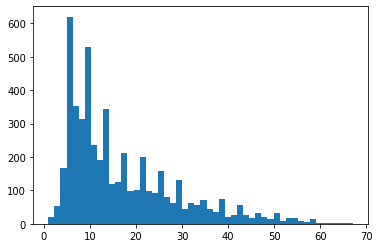

In [68]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [69]:
sum(hist_len) / len(x_train_small)

16.7994

In [70]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [72]:
y_train_small = y_train[0:5000]

In [73]:
import numpy as np
np.unique(y_train_small)

array([1, 2, 4, 5])

3이 빠져있는 것을 고려해서 5가지로 생각해야됨

# make model

In [77]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer, Bidrectional 양쪽으로 학습
model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['acc']) # gadget

In [78]:
hist = model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3)

Epoch 1/3


InvalidArgumentError: ignored